In [ ]:
"""
import os
import shutil

# Base dataset path
dataset = '/content/drive/MyDrive/senior-project/dataset-halfres'
# Validation dataset path
valid = '/content/drive/MyDrive/senior-project/dataset-validation'

# Ensure the validation directory exists
if not os.path.exists(valid):
    os.makedirs(valid)

for folder in os.listdir(dataset):
    folderpath = os.path.join(dataset, folder)
    dst_path = os.path.join(valid, folder)

    # Ensure each specific class folder exists in the validation directory
    if not os.path.exists(dst_path):
        os.makedirs(dst_path)

    i = 0
    for image in os.listdir(folderpath):
        if i > 7:
            # Move the file
            shutil.move(os.path.join(folderpath, image), os.path.join(dst_path, image))
            i = 0
            print(f"File {image} moved to {dst_path}")
        i += 1

"""

'\nimport os\nimport shutil\n\n# Base dataset path\ndataset = \'/content/drive/MyDrive/senior-project/dataset-halfres\'\n# Validation dataset path\nvalid = \'/content/drive/MyDrive/senior-project/dataset-validation\'\n\n# Ensure the validation directory exists\nif not os.path.exists(valid):\n    os.makedirs(valid)\n\nfor folder in os.listdir(dataset):\n    folderpath = os.path.join(dataset, folder)\n    dst_path = os.path.join(valid, folder)\n\n    # Ensure each specific class folder exists in the validation directory\n    if not os.path.exists(dst_path):\n        os.makedirs(dst_path)\n\n    i = 0\n    for image in os.listdir(folderpath):\n        if i > 7:\n            # Move the file\n            shutil.move(os.path.join(folderpath, image), os.path.join(dst_path, image))\n            i = 0\n            print(f"File {image} moved to {dst_path}")\n        i += 1\n\n'

In [ ]:
"""
import os
import shutil

# Base dataset path
dataset = '/content/drive/MyDrive/senior-project/dataset-halfres'
# Validation dataset path
valid = '/content/drive/MyDrive/senior-project/dataset-validation'

# Ensure the validation directory exists
if not os.path.exists(valid):
    os.makedirs(valid)

for folder in os.listdir(dataset):
    folderpath = os.path.join(dataset, folder)
    dst_path = os.path.join(valid, folder)

    # Ensure each specific class folder exists in the validation directory
    if not os.path.exists(dst_path):
        os.makedirs(dst_path)

    i = 0
    for image in os.listdir(folderpath):
        if i > 7:
            # Move the file
            shutil.move(os.path.join(folderpath, image), os.path.join(dst_path, image))
            i = 0
            print(f"File {image} moved to {dst_path}")
        i += 1

"""

'\nimport os\nimport shutil\n\n# Base dataset path\ndataset = \'/content/drive/MyDrive/senior-project/dataset-halfres\'\n# Validation dataset path\nvalid = \'/content/drive/MyDrive/senior-project/dataset-validation\'\n\n# Ensure the validation directory exists\nif not os.path.exists(valid):\n    os.makedirs(valid)\n\nfor folder in os.listdir(dataset):\n    folderpath = os.path.join(dataset, folder)\n    dst_path = os.path.join(valid, folder)\n\n    # Ensure each specific class folder exists in the validation directory\n    if not os.path.exists(dst_path):\n        os.makedirs(dst_path)\n\n    i = 0\n    for image in os.listdir(folderpath):\n        if i > 7:\n            # Move the file\n            shutil.move(os.path.join(folderpath, image), os.path.join(dst_path, image))\n            i = 0\n            print(f"File {image} moved to {dst_path}")\n        i += 1\n\n'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

import os
import random


In [ ]:

# training and validation directories
train_dir = '/content/drive/MyDrive/senior-project/dataset-train'
validation_dir = '/content/drive/MyDrive/senior-project/dataset-val'

target_size=(200, 150)

# parameters for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=40,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',

)

validation_datagen = ImageDataGenerator(
    rescale=1./255,

)

# batch size
batch_size = 32

# Prepare the data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= target_size,  #cropping instead of resizing to keep patterns on materials
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, Add, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define input layer
input_layer = Input(shape=(200, 150, 3))

# First Convolutional Block with Batch Normalization and LeakyReLU Activation Algo
x = Conv2D(32, (3, 3), padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling2D(2, 2)(x)

# Second Convolutional Block
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling2D(2, 2)(x)

# Third Convolutional Block with Residual Connection
identity = x  # Save the input value to this block
identity = Conv2D(128, (1, 1), padding='same')(identity)  # Adjust number of channels
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Add()([x, identity])
x = MaxPooling2D(2, 2)(x)

# Global Average Pooling in place of Flatten
x = GlobalAveragePooling2D()(x)

# Dense layer with dropout
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layer
output_layer = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Display the model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 200, 150, 32)         896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 200, 150, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 leaky_re_lu (LeakyReLU)     (None, 200, 150, 32)         0         ['batch_normalization[0][0

In [ ]:

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)


Epoch 1/10
110/110 [==============================] - 3674s 33s/step - loss: 2.2630 - accuracy: 0.3119 - val_loss: 5.6093 - val_accuracy: 0.0231
Epoch 2/10
110/110 [==============================] - 33s 299ms/step - loss: 1.4061 - accuracy: 0.5162 - val_loss: 6.3494 - val_accuracy: 0.0336
Epoch 3/10
110/110 [==============================] - 33s 298ms/step - loss: 1.2341 - accuracy: 0.5670 - val_loss: 4.1412 - val_accuracy: 0.1389
Epoch 4/10
110/110 [==============================] - 33s 299ms/step - loss: 1.1291 - accuracy: 0.6082 - val_loss: 3.6141 - val_accuracy: 0.2581
Epoch 5/10
110/110 [==============================] - 33s 296ms/step - loss: 0.9657 - accuracy: 0.6554 - val_loss: 1.2875 - val_accuracy: 0.5660
Epoch 6/10
110/110 [==============================] - 33s 295ms/step - loss: 0.9047 - accuracy: 0.6903 - val_loss: 1.2587 - val_accuracy: 0.5556
Epoch 7/10
110/110 [==============================] - 32s 294ms/step - loss: 0.8480 - accuracy: 0.6957 - val_loss: 4.0804 - val_ac

In [ ]:

# Save the model
model.save('/content/drive/MyDrive/senior-project/model-functionalApi3-e10')


In [ ]:


# Create a data generator for the validation data
test_datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data generator
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(200, 150),
    batch_size=1,  # Batch size set to 1 to process one image at a time
    class_mode='categorical',
    shuffle=True  # Shuffle to get different results each run
)

# Function to plot the image and prediction
def plot_image_prediction(image, predicted_label, true_label):
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')
    plt.show()

# Fetch a random image and its label
image_batch, label_batch = next(test_generator)  # This fetches the next batch

# Make a prediction
prediction = model.predict(image_batch)
predicted_class_index = np.argmax(prediction)
predicted_class = list(test_generator.class_indices.keys())[predicted_class_index]
true_class_index = np.argmax(label_batch)
true_class = list(test_generator.class_indices.keys())[true_class_index]

# Display the image and prediction
plot_image_prediction(image_batch[0], predicted_class, true_class)

NameError: name 'ImageDataGenerator' is not defined

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

Epoch 1/10
110/110 [==============================] - 33s 303ms/step - loss: 0.7152 - accuracy: 0.7335 - val_loss: 6.3330 - val_accuracy: 0.3495
Epoch 2/10
110/110 [==============================] - 33s 296ms/step - loss: 0.6843 - accuracy: 0.7455 - val_loss: 2.2765 - val_accuracy: 0.5093
Epoch 3/10
110/110 [==============================] - 33s 300ms/step - loss: 0.6855 - accuracy: 0.7509 - val_loss: 1.2992 - val_accuracy: 0.6053
Epoch 4/10
110/110 [==============================] - 33s 296ms/step - loss: 0.6032 - accuracy: 0.7713 - val_loss: 1.6282 - val_accuracy: 0.5845
Epoch 5/10
110/110 [==============================] - 33s 296ms/step - loss: 0.6069 - accuracy: 0.7750 - val_loss: 1.9649 - val_accuracy: 0.5370
Epoch 6/10
110/110 [==============================] - 33s 296ms/step - loss: 0.5813 - accuracy: 0.7810 - val_loss: 2.9955 - val_accuracy: 0.4873
Epoch 7/10
110/110 [==============================] - 33s 295ms/step - loss: 0.5603 - accuracy: 0.7906 - val_loss: 1.1845 - val_ac

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/senior-project/model-functionalApi3-e20')

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20
)

Epoch 1/20
110/110 [==============================] - 33s 299ms/step - loss: 0.4815 - accuracy: 0.8205 - val_loss: 1.2775 - val_accuracy: 0.6435
Epoch 2/20
110/110 [==============================] - 33s 301ms/step - loss: 0.5308 - accuracy: 0.8003 - val_loss: 1.4131 - val_accuracy: 0.6192
Epoch 3/20
110/110 [==============================] - 33s 297ms/step - loss: 0.4924 - accuracy: 0.8125 - val_loss: 1.2922 - val_accuracy: 0.6053
Epoch 4/20
110/110 [==============================] - 33s 299ms/step - loss: 0.4779 - accuracy: 0.8159 - val_loss: 4.3424 - val_accuracy: 0.5000
Epoch 5/20
110/110 [==============================] - 33s 295ms/step - loss: 0.5028 - accuracy: 0.8031 - val_loss: 0.5027 - val_accuracy: 0.7951
Epoch 6/20
110/110 [==============================] - 33s 296ms/step - loss: 0.4736 - accuracy: 0.8088 - val_loss: 0.9146 - val_accuracy: 0.7106
Epoch 7/20
110/110 [==============================] - 33s 299ms/step - loss: 0.4812 - accuracy: 0.8182 - val_loss: 0.9761 - val_ac

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/senior-project/model-functionalApi3-e40')

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=30
)

Epoch 1/30
110/110 [==============================] - 33s 299ms/step - loss: 0.3548 - accuracy: 0.8537 - val_loss: 0.9848 - val_accuracy: 0.6817
Epoch 2/30
110/110 [==============================] - 33s 297ms/step - loss: 0.3671 - accuracy: 0.8480 - val_loss: 0.6402 - val_accuracy: 0.7951
Epoch 3/30
110/110 [==============================] - 32s 294ms/step - loss: 0.3374 - accuracy: 0.8562 - val_loss: 0.5251 - val_accuracy: 0.8067
Epoch 4/30
110/110 [==============================] - 33s 299ms/step - loss: 0.3656 - accuracy: 0.8562 - val_loss: 0.6598 - val_accuracy: 0.7812
Epoch 5/30
110/110 [==============================] - 33s 296ms/step - loss: 0.3758 - accuracy: 0.8506 - val_loss: 0.7056 - val_accuracy: 0.7593
Epoch 6/30
110/110 [==============================] - 33s 297ms/step - loss: 0.3616 - accuracy: 0.8580 - val_loss: 2.5204 - val_accuracy: 0.5984
Epoch 7/30
110/110 [==============================] - 32s 295ms/step - loss: 0.3938 - accuracy: 0.8494 - val_loss: 1.3495 - val_ac

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/senior-project/model-functionalApi2-e70')

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=30
)

Epoch 1/30
110/110 [==============================] - 33s 296ms/step - loss: 0.2984 - accuracy: 0.8784 - val_loss: 0.8997 - val_accuracy: 0.7326
Epoch 2/30
110/110 [==============================] - 33s 295ms/step - loss: 0.2832 - accuracy: 0.8818 - val_loss: 0.4920 - val_accuracy: 0.8241
Epoch 3/30
110/110 [==============================] - 33s 298ms/step - loss: 0.2616 - accuracy: 0.8841 - val_loss: 0.7735 - val_accuracy: 0.7662
Epoch 4/30
110/110 [==============================] - 33s 297ms/step - loss: 0.3030 - accuracy: 0.8747 - val_loss: 0.8963 - val_accuracy: 0.7384
Epoch 5/30
110/110 [==============================] - 32s 295ms/step - loss: 0.2652 - accuracy: 0.8804 - val_loss: 0.4839 - val_accuracy: 0.8021
Epoch 6/30
110/110 [==============================] - 33s 298ms/step - loss: 0.2884 - accuracy: 0.8793 - val_loss: 3.2063 - val_accuracy: 0.5567
Epoch 7/30
110/110 [==============================] - 33s 297ms/step - loss: 0.2617 - accuracy: 0.8878 - val_loss: 0.9192 - val_ac

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/senior-project/model-functionalApi3-e100')

Found 880 images belonging to 44 classes.
1/1 [==============================] - 0s 21ms/step


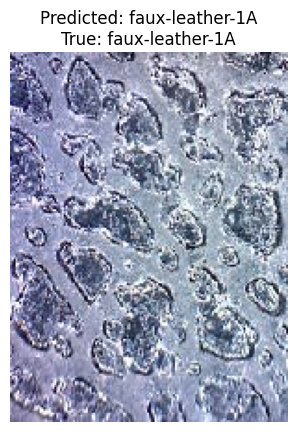

In [ ]:


# Create a data generator for the validation data
test_datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data generator
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(200, 150),
    batch_size=1,  # Batch size set to 1 to process one image at a time
    class_mode='categorical',
    shuffle=True  # Shuffle to get different results each run
)

# Function to plot the image and prediction
def plot_image_prediction(image, predicted_label, true_label):
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')
    plt.show()

# Fetch a random image and its label
image_batch, label_batch = next(test_generator)  # This fetches the next batch

# Make a prediction
prediction = model.predict(image_batch)
predicted_class_index = np.argmax(prediction)
predicted_class = list(test_generator.class_indices.keys())[predicted_class_index]
true_class_index = np.argmax(label_batch)
true_class = list(test_generator.class_indices.keys())[true_class_index]

# Display the image and prediction
plot_image_prediction(image_batch[0], predicted_class, true_class)